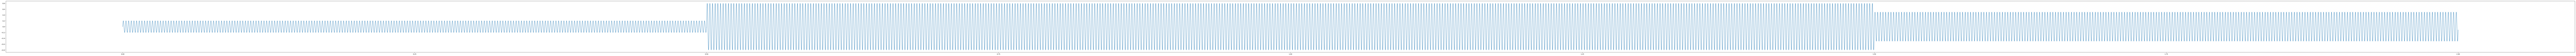

In [79]:
import math
import matplotlib.pyplot as plt

PI = 3.1415
sr = 48000

T = -12
W = 0.7
R = 2
# ms
ATT = 20
REL = 50

ATT_COEF = math.exp(-1 / ((ATT / 1000) * sr))
REL_COEF = math.exp(-1 / ((REL / 1000) * sr))

buffer = [0.0 for i in range(2 * sr)]
x_ax = [(i / sr) for i in range(2 * sr)]

for i in range(2 * sr):
    if i < (0.5 * sr):
        buffer[i] = 0.2 * math.sin(440 * 2 * PI * (i / sr))
    else:
        if (i < 1.5 * sr):
            buffer[i] = 0.8 * math.sin(440 * 2 * PI * (i / sr))
        else:
            if (i < 2 * sr):
                buffer[i] = 0.5 * math.sin(440 * 2 * PI * (i / sr))


plt.figure(figsize=(300,6))
plt.plot(x_ax, buffer)
plt.show()


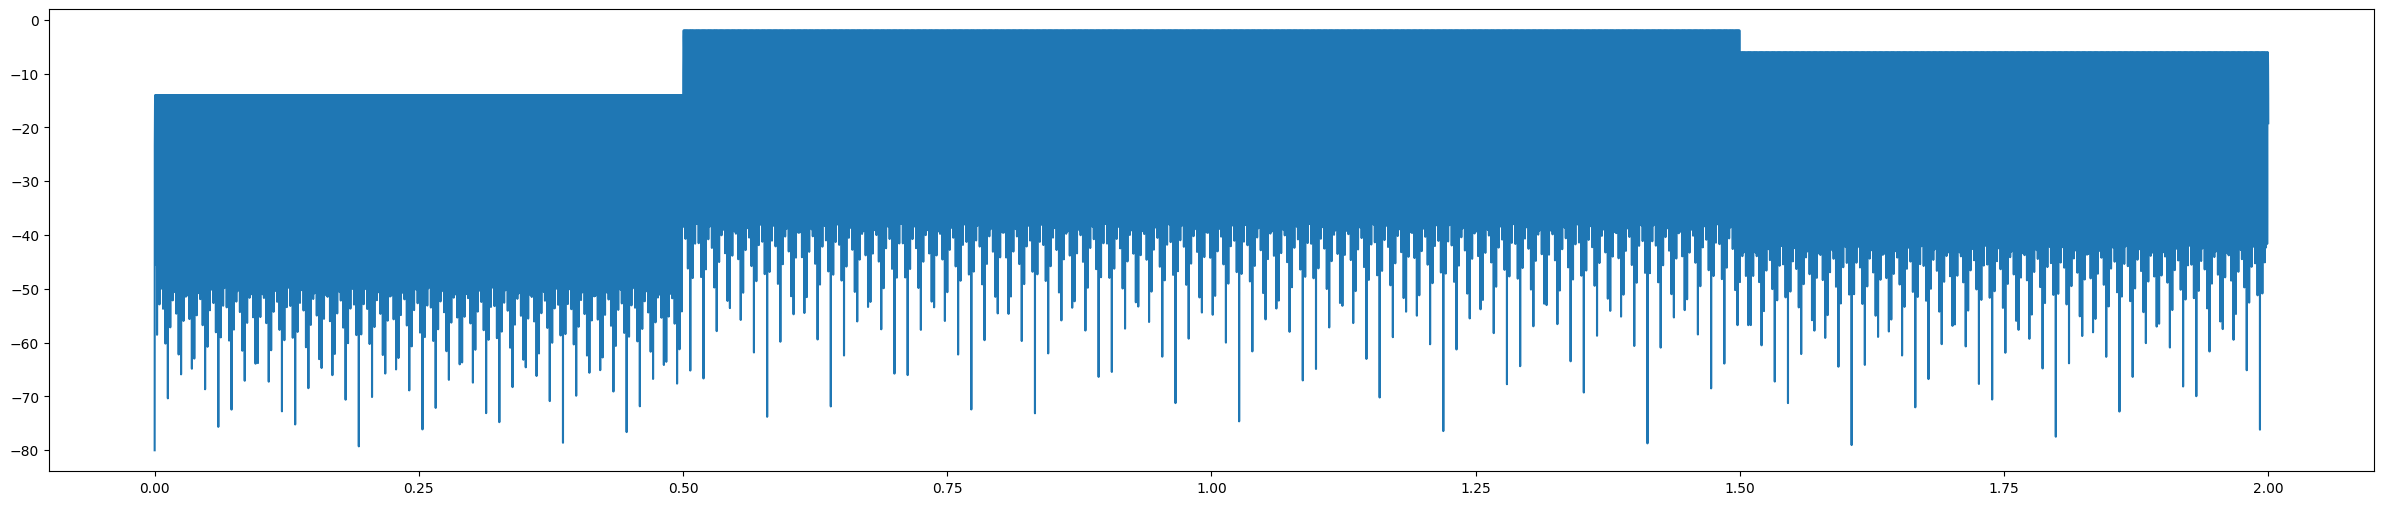

In [80]:
buffer_db = [0.0 for i in range(2 * sr)]
for i, val in enumerate(buffer):
    buffer_db[i] = 20.0 * math.log10(abs(val) + 0.0001)

plt.figure(figsize=(30,6))
plt.plot(x_ax, buffer_db)
plt.show()

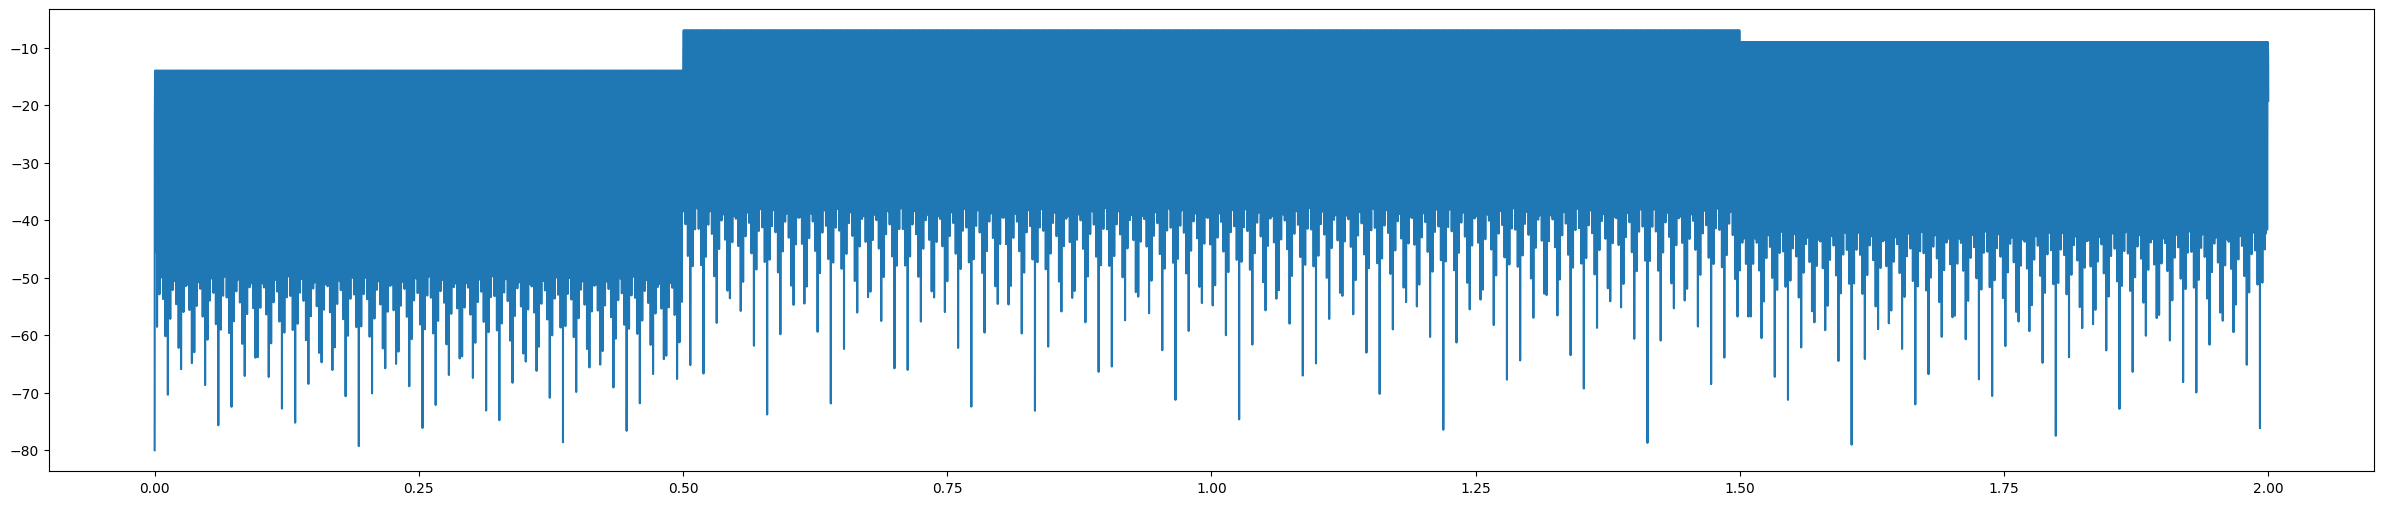

In [81]:
calc_gain = [0.0 for i in range(2 * sr)]
for i, db in enumerate(buffer_db):
    match db:
        case db if 2 * (db - T) <= W:
            calc_gain[i] = db
        case db if 2 * abs(db - T) <= W:
            calc_gain[i] = db + ((1 / R) * (db - T + pow(W/2, 2)))/ (2 * W)
        case db if 2 * (db - T) > W:
            calc_gain[i] = T + (db - T) / R

plt.figure(figsize=(30,6))
plt.plot(x_ax, calc_gain)
plt.show()
        

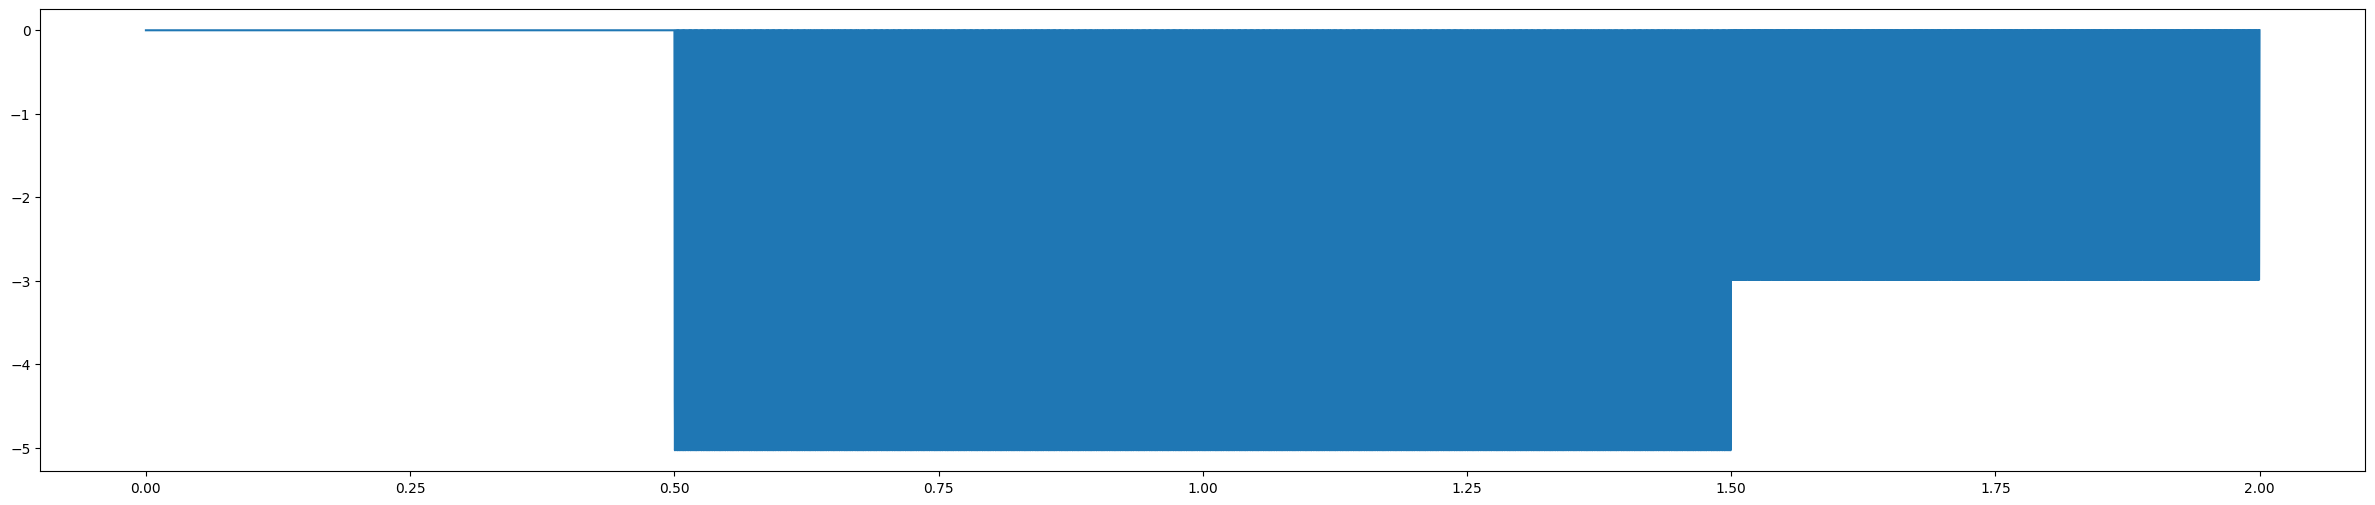

In [82]:
gain_diff = [(calc_gain[i] - buffer_db[i]) for i in range(2 * sr)]
plt.figure(figsize=(30,6))
plt.plot(x_ax, gain_diff)
plt.show()

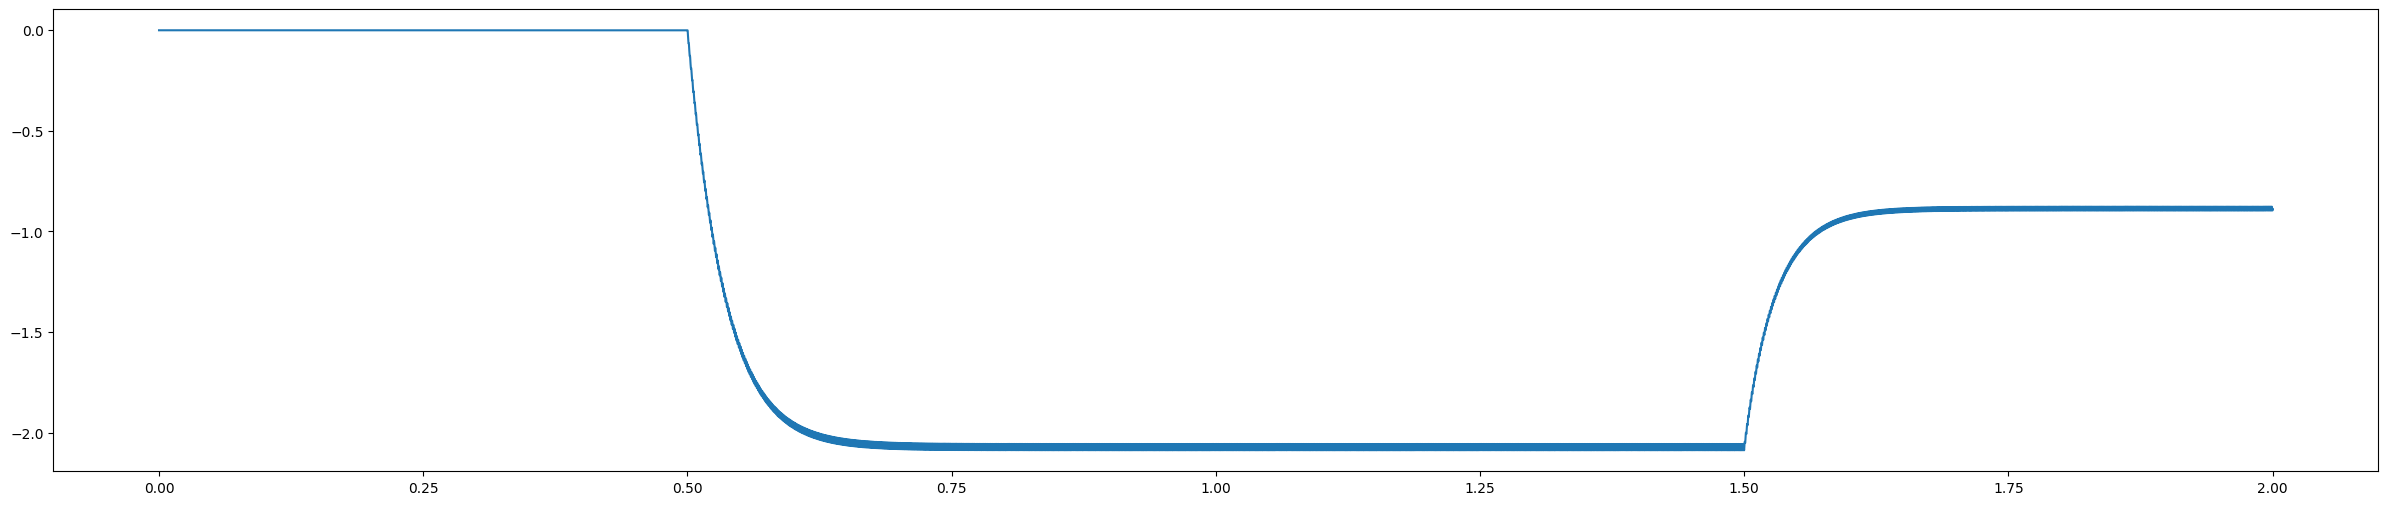

In [83]:
envelope = [0.0 for i in range(2 * sr)]
prev_v = 0.0
for i, diff in enumerate(gain_diff):
    match diff:
        case diff if diff > prev_v:
            val = ATT_COEF * prev_v + (1 - ATT_COEF) * diff
            prev_v = val
            envelope[i] = val
        case diff if diff <= prev_v:
            val = REL_COEF * prev_v + (1 - REL_COEF) * diff
            prev_v = val
            envelope[i] = val

plt.figure(figsize=(30,6))
plt.plot(x_ax, envelope)
plt.show()

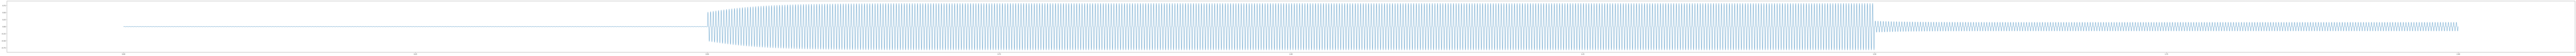

In [84]:
# compressed_db = [(buffer_db[i] - envelope[i]) for i in range(2 * sr)]
compressed_audio = [(buffer[i] * math.pow(10, (buffer_db[i] - envelope[i]) / 10)) for i in range(2 * sr)]

plt.figure(figsize=(300,6))
plt.plot(x_ax, compressed_audio)
plt.show()